In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator

In [2]:
sns.set_context("paper")

In [3]:
IDkey = pd.read_csv('filtered_meta.txt',sep='\t')
scaden = pd.read_csv('ROSMAPpred_scaden.txt',index_col=0,sep='\t')
tape = pd.read_csv('ROSMAPpred_tape.csv',index_col=0)
csx = pd.read_csv('ROSMAPpred_csx.csv',index_col=0)
music = pd.read_csv('ROSMAPpred_music.csv',index_col=0)
rnasieve = pd.read_csv('ROSMAPpred_rnasieve.csv',index_col=0)
dwls = pd.read_csv('ROSMAPpred_dwls.csv',index_col=0).T
bisque = pd.read_csv('ROSMAPpred_bisque.csv',index_col=0).T

In [4]:
rnasieve.index = tape.index
dwls.index = tape.index
scaden.index = tape.index
music.index = tape.index
csx.index = tape.index
bisque.index = tape.index

In [5]:
csx['Neurons'] = csx['InNeurons']+csx['ExNeurons']
rnasieve['Neurons'] = rnasieve['InNeurons']+rnasieve['ExNeurons']
tape['Neurons'] = tape['InNeurons']+tape['ExNeurons']
scaden['Neurons'] = scaden['InNeurons']+scaden['ExNeurons']
music['Neurons'] = music['InNeurons']+music['ExNeurons']
dwls['Neurons'] = dwls['InNeurons']+dwls['ExNeurons']
bisque['Neurons'] = bisque['InNeurons']+bisque['ExNeurons']

In [6]:
rnaseqid = list(IDkey['rnaseq_id'])
IDkey['rnaseq_id'] = rnaseqid

In [7]:
braaksc = list(IDkey['braaksc'])
ceradsc = list(IDkey['ceradsc'])
braak = []
cerad = []
intersection = tape.index.intersection(rnaseqid)
tape = tape.loc[intersection]
scaden = scaden.loc[intersection]
rnasieve = rnasieve.loc[intersection]
csx = csx.loc[intersection]
dwls = dwls.loc[intersection]
music = music.loc[intersection]
bisque = bisque.loc[intersection]
for seqid in tape.index:
    index = rnaseqid.index(seqid)
    braak.append(braaksc[index])
    cerad.append(ceradsc[index])
print(len(braak),len(cerad))

532 532


In [8]:
tape['braak'] = braak
scaden['braak'] = braak
tape['cerad'] = cerad
scaden['cerad'] = cerad
rnasieve['braak'] = braak
rnasieve['cerad'] = cerad
csx['braak'] = braak
csx['cerad'] = cerad
dwls['braak'] = braak
dwls['cerad'] = cerad
music['braak'] = braak
music['cerad'] = cerad
bisque['braak'] = braak
bisque['cerad'] = cerad

In [9]:
colors = sns.color_palette()
colors = [colors[i] for i in [0,1,4,3,5,6,9]]

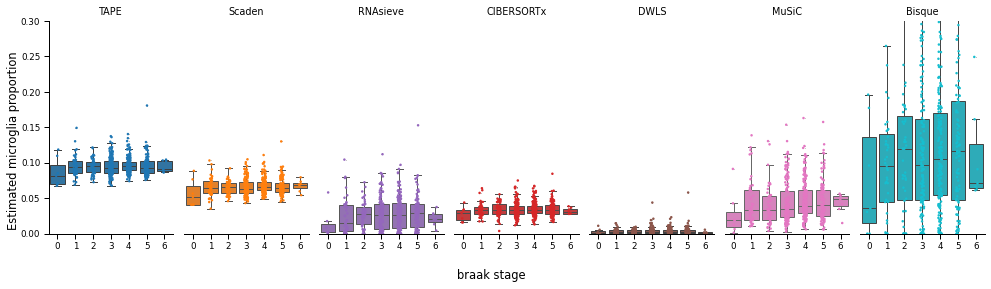

In [10]:
fig, axes = plt.subplots(1,7,sharex=True, sharey=True,figsize=(14,4))
data = [tape, scaden, rnasieve, csx, dwls, music, bisque]
name = ['TAPE','Scaden','RNAsieve','CIBERSORTx','DWLS','MuSiC','Bisque']
y_major_locator=MultipleLocator(0.05)
for i in range(len(data)):
    sns.stripplot(x='braak',y='Microglia',data=data[i],ax=axes[i],color=colors[i],marker='.')
    sns.boxplot(x='braak',y='Microglia',data=data[i],ax=axes[i],color=colors[i],fliersize=0.1,linewidth=1)
    axes[i].set(xlabel=None,ylabel=None)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].yaxis.set_major_locator(y_major_locator)
    if i >= 1:
        axes[i].spines['left'].set_visible(False)
        axes[i].yaxis.set_visible(False)
    axes[i].set_title(name[i])
plt.ylim(0,0.3)
fig.supxlabel('braak stage')
fig.supylabel('Estimated microglia proportion')
plt.tight_layout()
fig.savefig('microglia_braak.eps', format='eps', dpi=300)
plt.show()

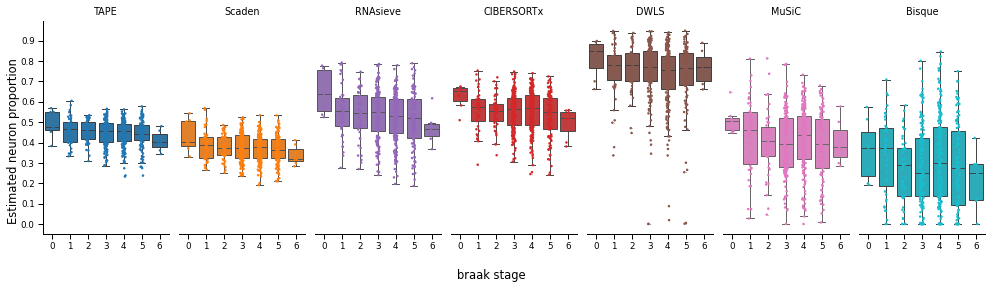

In [11]:
data = [tape, scaden, rnasieve, csx, dwls, music, bisque]
name = ['TAPE','Scaden','RNAsieve','CIBERSORTx','DWLS', 'MuSiC', 'Bisque']
fig, axes = plt.subplots(1,len(name),sharex=True, sharey=True,figsize=(14,4))
y_major_locator=MultipleLocator(0.1)
for i in range(len(name)):
    sns.stripplot(x='braak',y='Neurons',data=data[i],ax=axes[i],color=colors[i],marker='.')
    sns.boxplot(x='braak',y='Neurons',data=data[i],ax=axes[i],color=colors[i],fliersize=0.1,linewidth=1)
    axes[i].set(xlabel=None,ylabel=None)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].yaxis.set_major_locator(y_major_locator)
    if i >= 1:
        axes[i].spines['left'].set_visible(False)
        axes[i].yaxis.set_visible(False)
    axes[i].set_title(name[i])
    
fig.supxlabel('braak stage')
fig.supylabel('Estimated neuron proportion')
plt.tight_layout()
fig.savefig('neurons_braak.eps', format='eps', dpi=300)
plt.show()

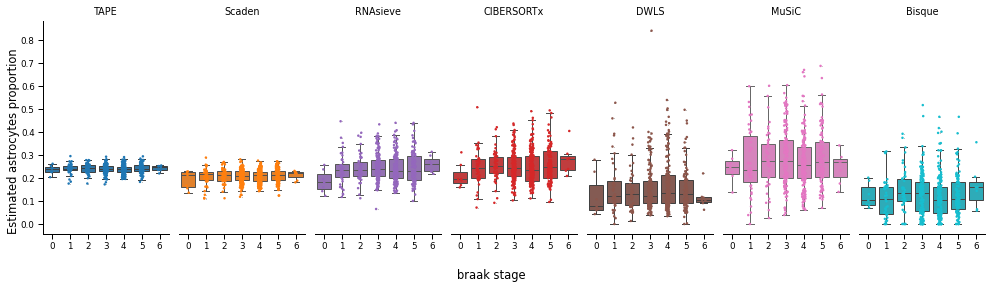

In [12]:
data = [tape, scaden, rnasieve, csx, dwls, music, bisque]
name = ['TAPE','Scaden','RNAsieve','CIBERSORTx','DWLS', 'MuSiC', 'Bisque']
fig, axes = plt.subplots(1,len(name),sharex=True, sharey=True,figsize=(14,4))
y_major_locator=MultipleLocator(0.1)
for i in range(len(name)):
    sns.stripplot(x='braak',y='Astrocytes',data=data[i],ax=axes[i],color=colors[i],marker='.')
    sns.boxplot(x='braak',y='Astrocytes',data=data[i],ax=axes[i],color=colors[i],fliersize=0.1,linewidth=1)
    axes[i].set(xlabel=None,ylabel=None)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].yaxis.set_major_locator(y_major_locator)
    if i >= 1:
        axes[i].spines['left'].set_visible(False)
        axes[i].yaxis.set_visible(False)
    axes[i].set_title(name[i])
    
fig.supxlabel('braak stage')
fig.supylabel('Estimated astrocytes proportion')
plt.tight_layout()
fig.savefig('astrocytes_braak.eps', format='eps', dpi=300)
plt.show()

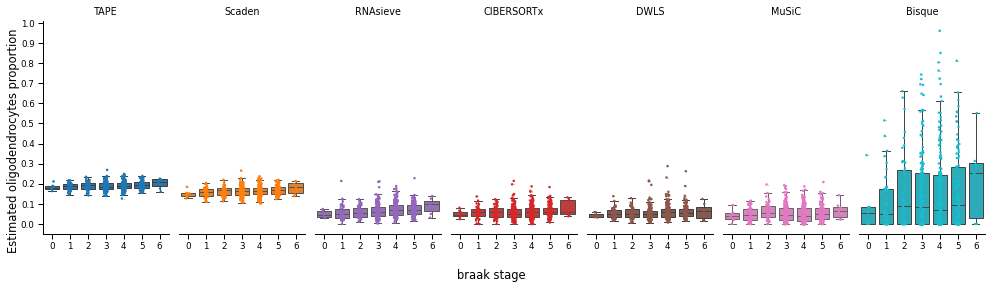

In [13]:
data = [tape, scaden, rnasieve, csx, dwls, music, bisque]
name = ['TAPE','Scaden','RNAsieve','CIBERSORTx','DWLS', 'MuSiC', 'Bisque']
fig, axes = plt.subplots(1,len(name),sharex=True, sharey=True,figsize=(14,4))
y_major_locator=MultipleLocator(0.1)
for i in range(len(name)):
    sns.stripplot(x='braak',y='Oligodendrocytes',data=data[i],ax=axes[i],color=colors[i],marker='.')
    sns.boxplot(x='braak',y='Oligodendrocytes',data=data[i],ax=axes[i],color=colors[i],fliersize=0.1,linewidth=1)
    axes[i].set(xlabel=None,ylabel=None)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].yaxis.set_major_locator(y_major_locator)
    if i >= 1:
        axes[i].spines['left'].set_visible(False)
        axes[i].yaxis.set_visible(False)
    axes[i].set_title(name[i])
    
fig.supxlabel('braak stage')
fig.supylabel('Estimated oligodendrocytes proportion')
plt.tight_layout()
fig.savefig('oligodendrocytes_braak.eps', format='eps', dpi=300)
plt.show()

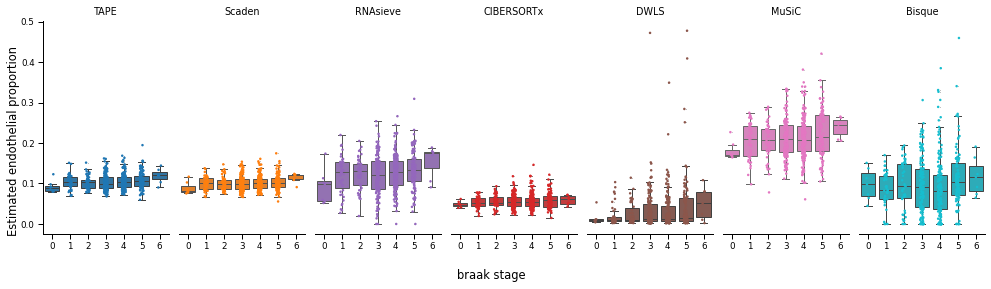

In [14]:
data = [tape, scaden, rnasieve, csx, dwls, music, bisque]
name = ['TAPE','Scaden','RNAsieve','CIBERSORTx','DWLS', 'MuSiC', 'Bisque']
fig, axes = plt.subplots(1,len(name),sharex=True, sharey=True,figsize=(14,4))
y_major_locator=MultipleLocator(0.1)
for i in range(len(name)):
    sns.stripplot(x='braak',y='Endothelial',data=data[i],ax=axes[i],color=colors[i],marker='.')
    sns.boxplot(x='braak',y='Endothelial',data=data[i],ax=axes[i],color=colors[i],fliersize=0.1,linewidth=1)
    axes[i].set(xlabel=None,ylabel=None)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].yaxis.set_major_locator(y_major_locator)
    if i >= 1:
        axes[i].spines['left'].set_visible(False)
        axes[i].yaxis.set_visible(False)
    axes[i].set_title(name[i])
    
fig.supxlabel('braak stage')
fig.supylabel('Estimated endothelial proportion')
plt.tight_layout()
fig.savefig('endothelial_braak.eps', format='eps', dpi=300)
plt.show()

In [15]:
truth = pd.read_csv('ROSMAP_IHC_fractions.csv',index_col=0)
braak_truth = []
for i in range(len(truth)):
    braak_truth.append(IDkey.loc[IDkey['projid.x']==truth.index.intersection(IDkey['projid.x'])[i],:]['braaksc'].values)
braak_truth = [int(x) for x in braak_truth]
truth['braak'] = braak_truth

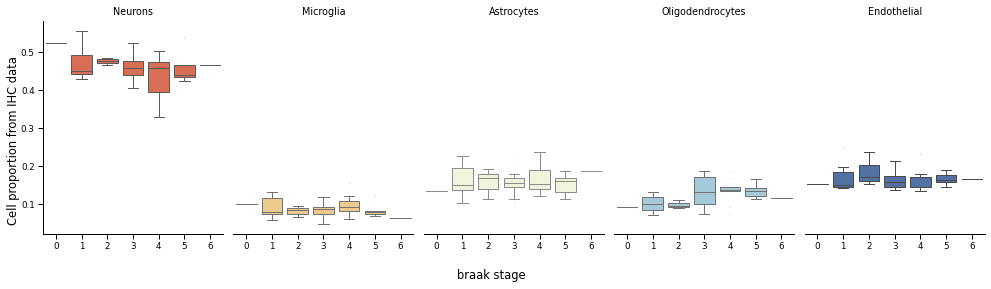

In [16]:
colors = sns.color_palette('RdYlBu', 10)
name = ['Neurons','Microglia','Astrocytes','Oligodendrocytes','Endothelial']
fig, axes = plt.subplots(1,5,sharex=True, sharey=True,figsize=(14,4))
sns.boxplot(x='braak',y='Neurons',data=truth,fliersize=0.1,linewidth=1,color=colors[1],ax=axes[0])
sns.boxplot(x='braak',y='Microglia',data=truth,fliersize=0.1,linewidth=1,color=colors[3],ax=axes[1])
sns.boxplot(x='braak',y='Astrocytes',data=truth,fliersize=0.1,linewidth=1,color=colors[5],ax=axes[2])
sns.boxplot(x='braak',y='Oligodendrocytes',data=truth,fliersize=0.1,linewidth=1,color=colors[7],ax=axes[3])
sns.boxplot(x='braak',y='Endothelial',data=truth,fliersize=0.1,linewidth=1,color=colors[9],ax=axes[4])
for i in range(5):
    axes[i].set(xlabel=None,ylabel=None)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].set_title(name[i])
    if i > 0:
        axes[i].spines['left'].set_visible(False)
        axes[i].yaxis.set_visible(False)
fig.supxlabel('braak stage')
fig.supylabel('Cell proportion from IHC data')
plt.tight_layout()
fig.savefig('IHC_braak.eps', format='eps', dpi=300)
plt.show()